###Descripción del Dataset PIMA DIABETES


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.shape)

(768, 9)


In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###Análisis Exploratorio de Datos

/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


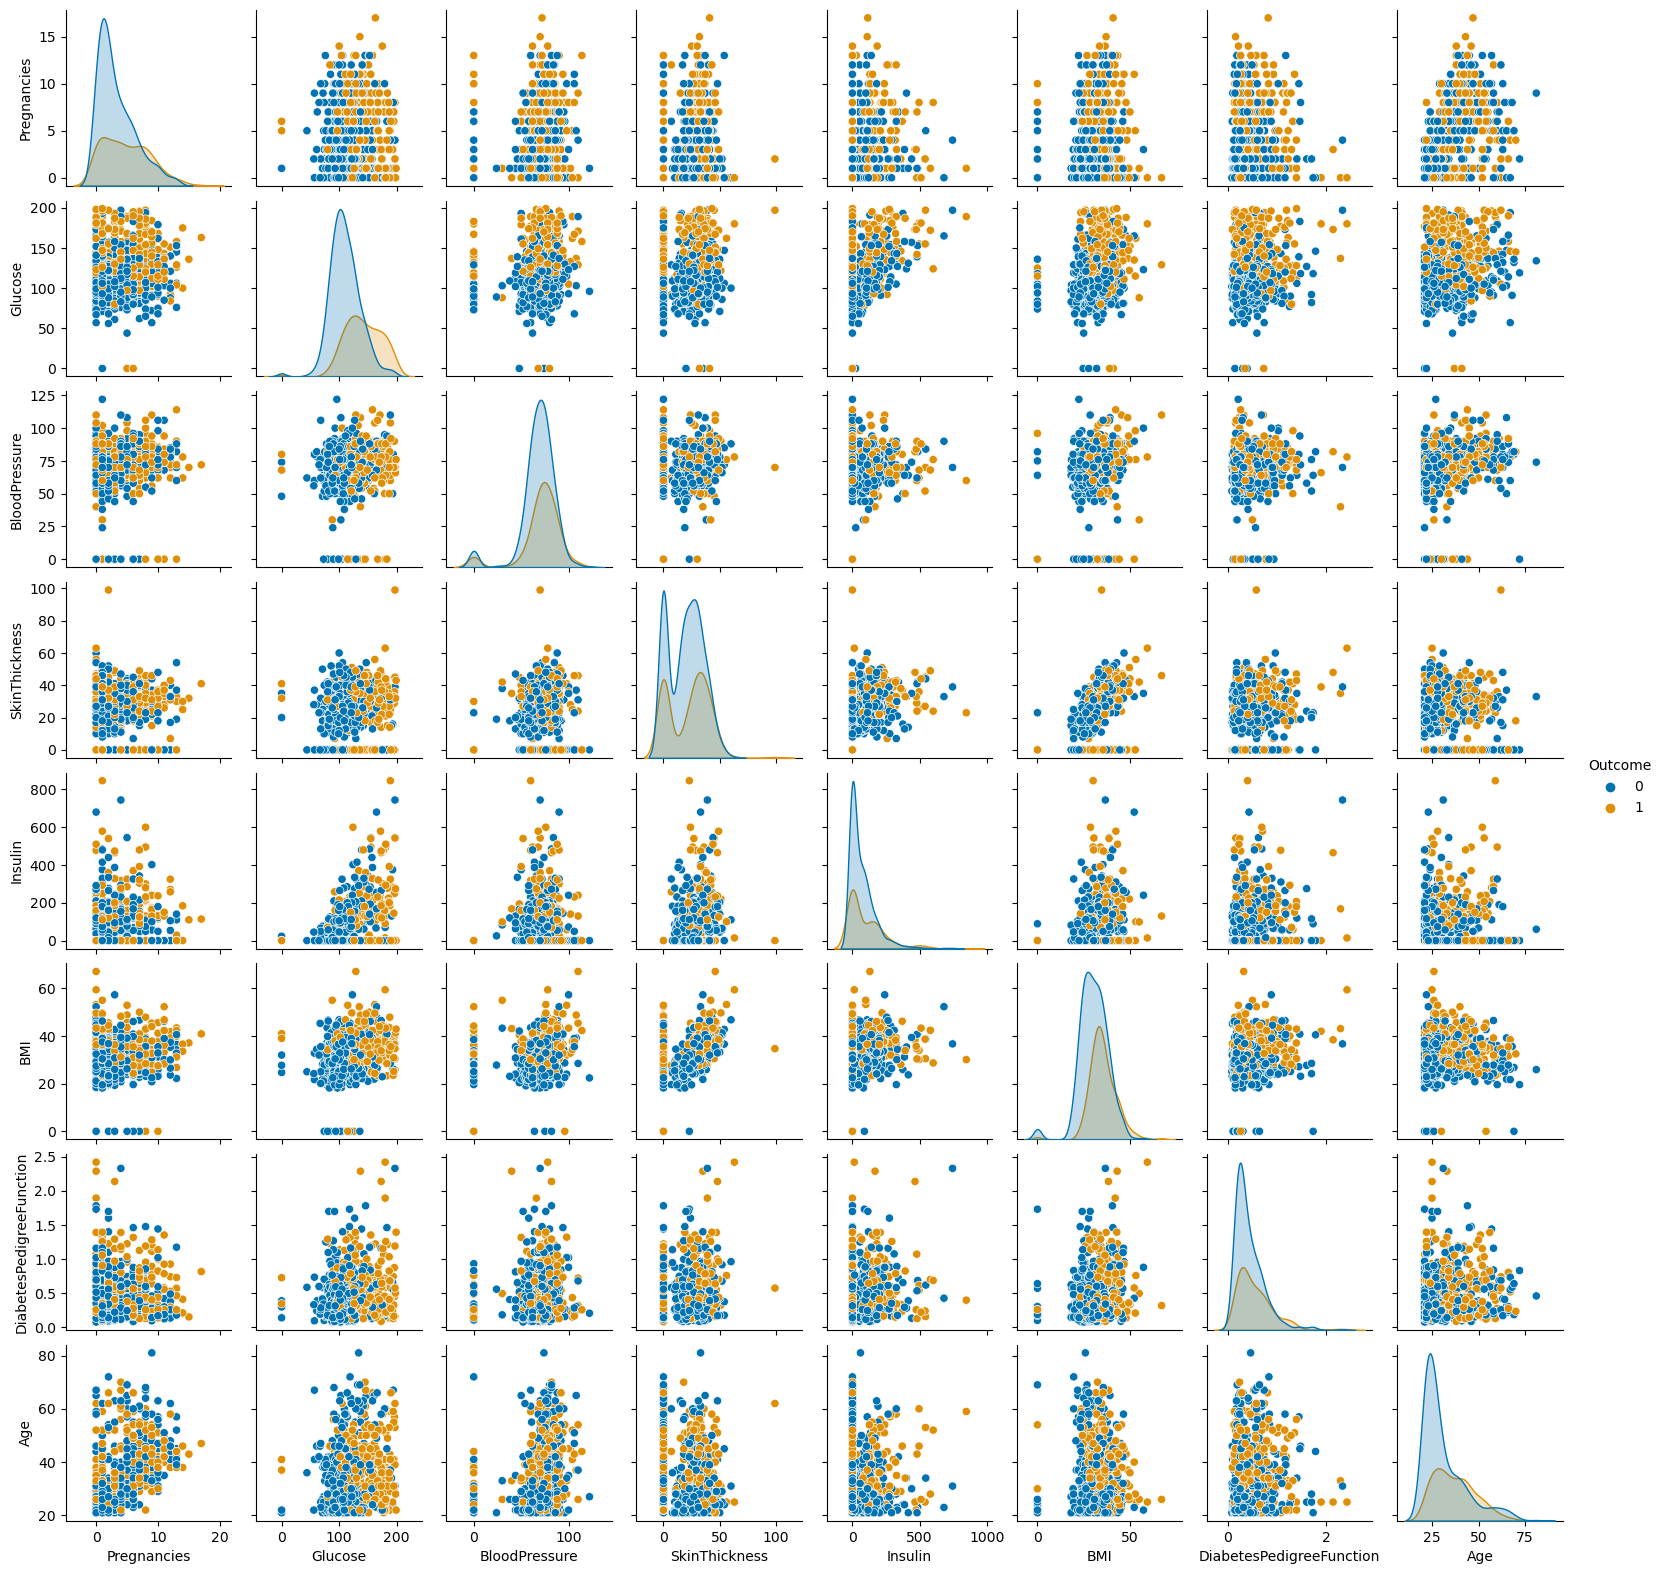

In [6]:
import seaborn as sns
sns.pairplot(diabetes, hue = 'Outcome', height= 2, palette='colorblind');

/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


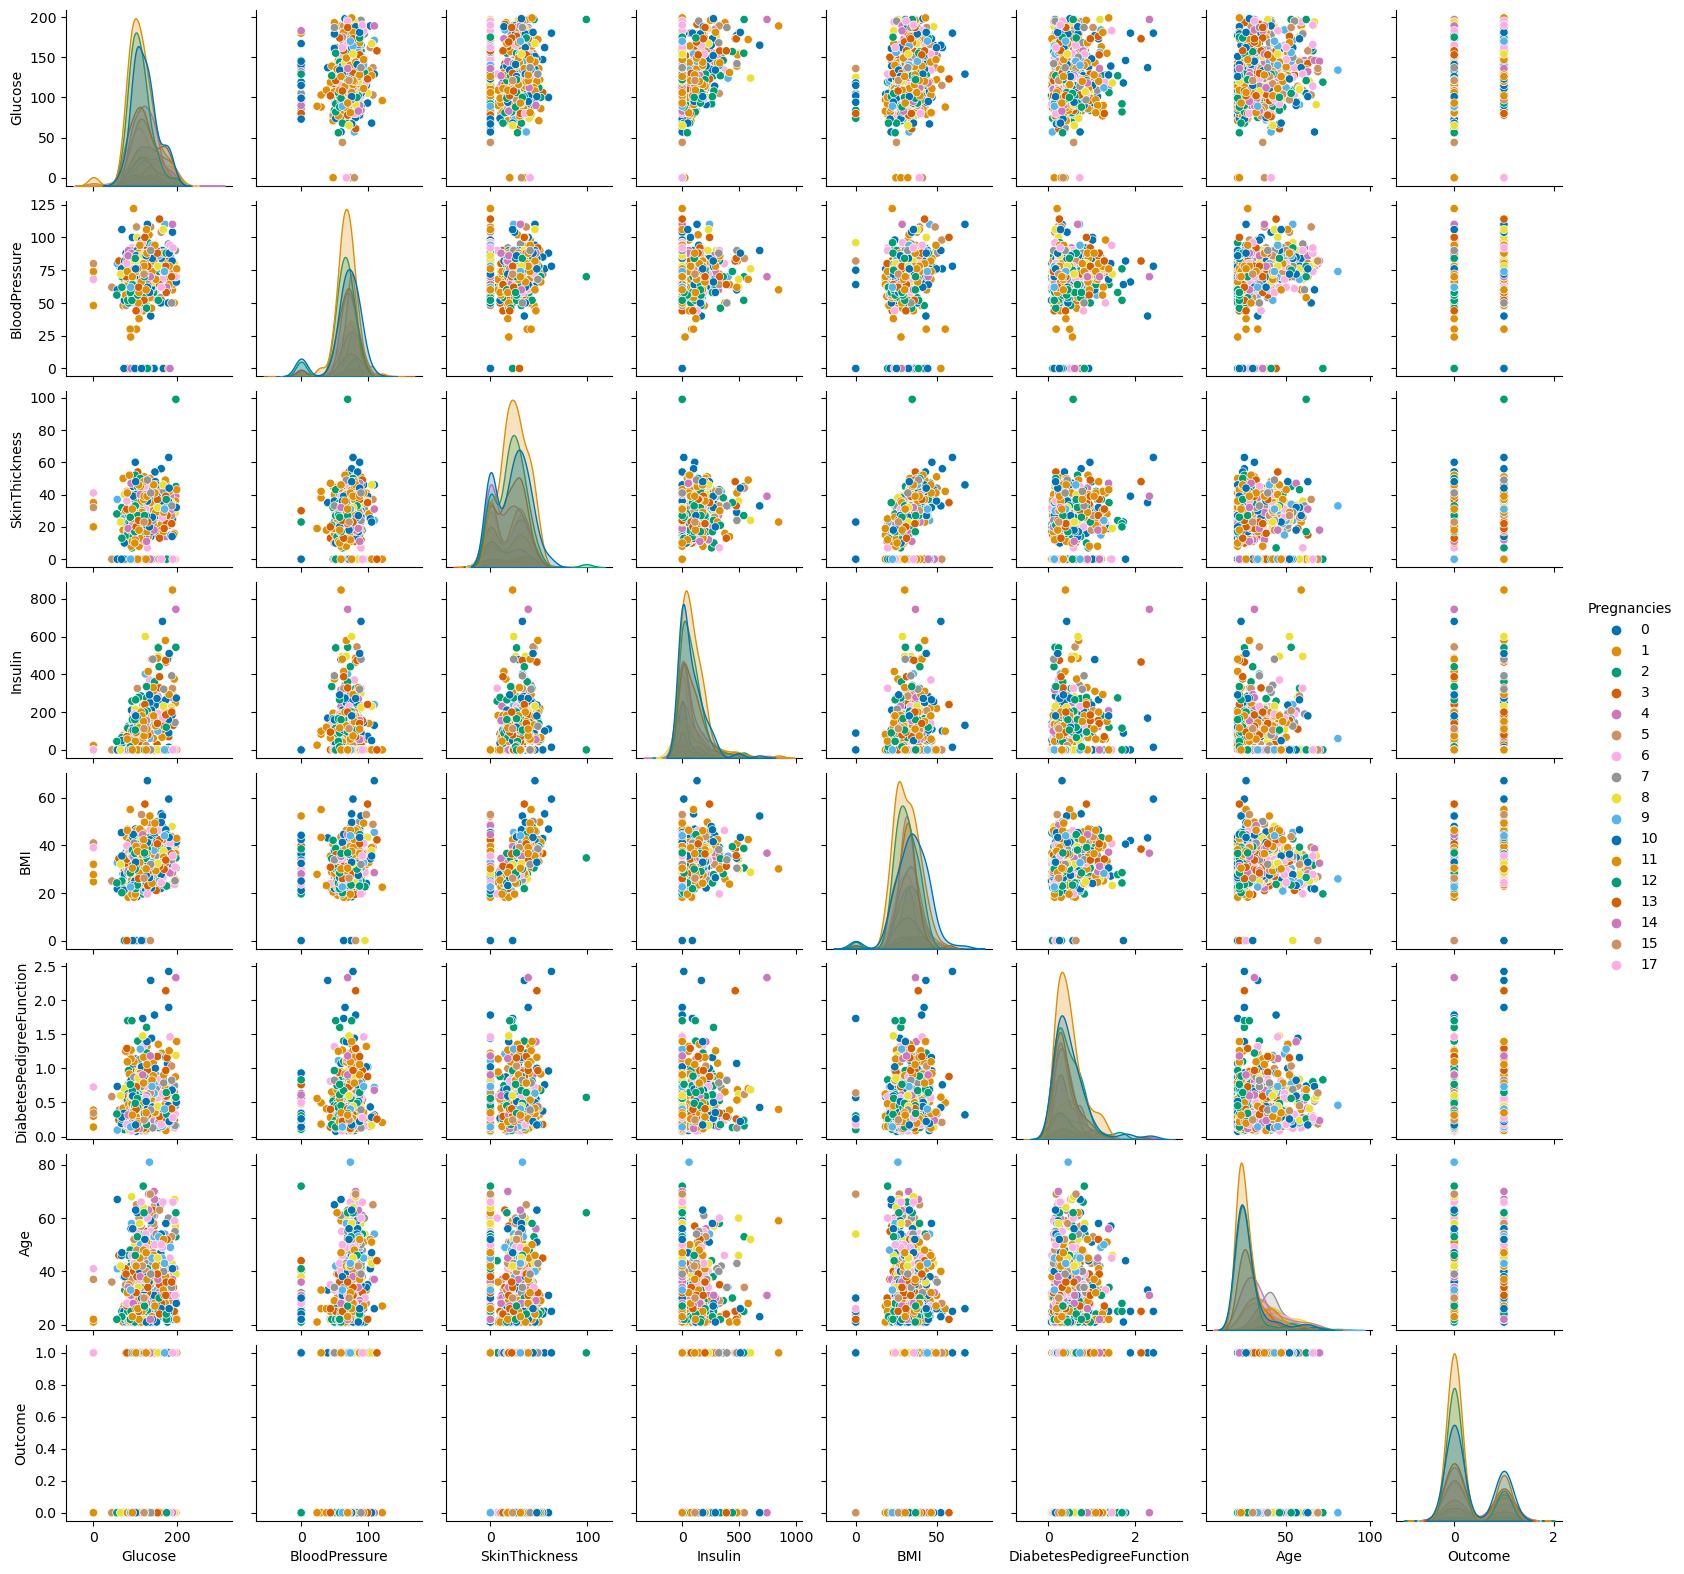

In [7]:
#Para entender el comportamiento de la gráfica de pares
import seaborn as sns
sns.pairplot(diabetes, hue = 'Pregnancies', height= 2, palette='colorblind');

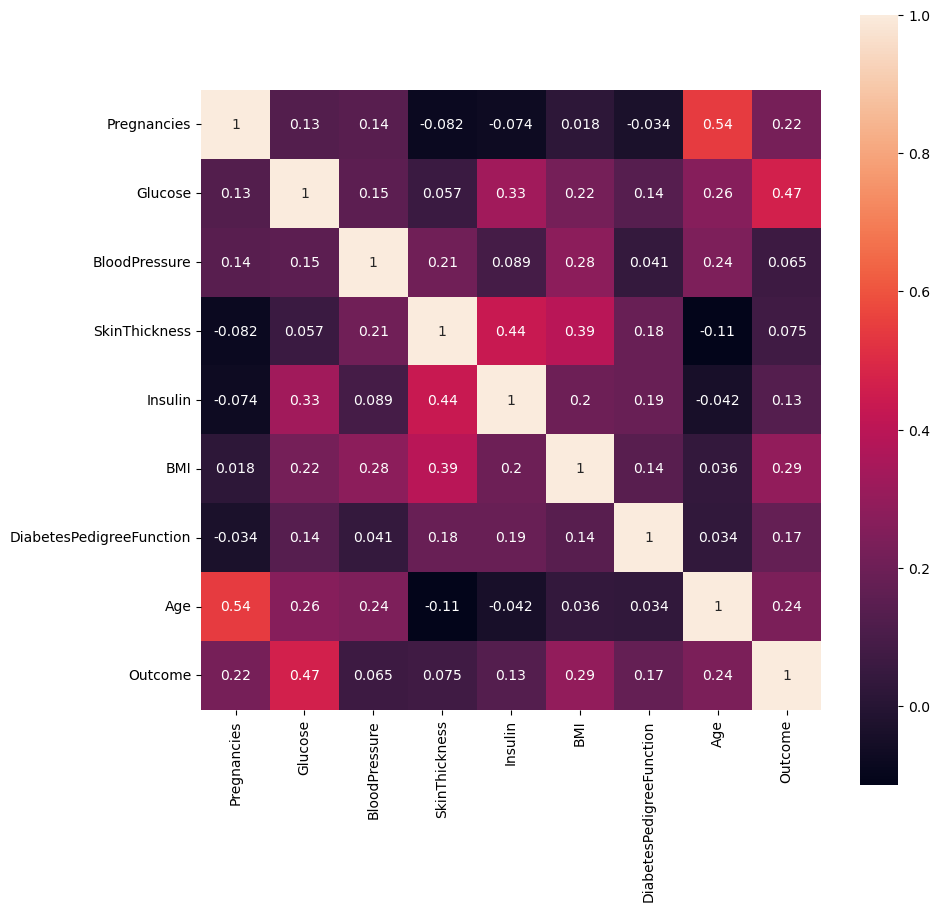

In [8]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(diabetes.corr(), annot= True, square=True,ax=ax);

###Preparación de los datos


In [20]:
#Separación entre entrenamiento y test
from sklearn.model_selection import train_test_split

train, test = train_test_split(diabetes, stratify = diabetes['Outcome'], test_size = 0.3, random_state = 100)

print(train.shape, test.shape)

(537, 9) (231, 9)


In [23]:
#Separación de los conjuntos de datos
X_train = np.c_[train['Pregnancies'], train['Glucose'],train['BloodPressure'],train['SkinThickness'],train['Insulin'],train['BMI'],train['DiabetesPedigreeFunction'],train['Age']]
y_train = train['Outcome'].values

X_test = np.c_[test['Pregnancies'], test['Glucose'],test['BloodPressure'],test['SkinThickness'],test['Insulin'],test['BMI'],test['DiabetesPedigreeFunction'],test['Age']]
y_test = test['Outcome'].values

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(537, 8) (537,)
(231, 8) (231,)


###Modelo con  Scikit-Learn

In [24]:
#Definición del modelo
from sklearn.neural_network import MLPClassifier

red_skl = MLPClassifier(hidden_layer_sizes = (64,32,16,8,4,2,1), activation = 'logistic', solver = 'sgd', max_iter = 100000000)
red_skl.fit(X_train, y_train)

MLPClassifier(activation='logistic',
              hidden_layer_sizes=(64, 32, 16, 8, 4, 2, 1), max_iter=100000000,
              solver='sgd')

In [26]:
#evaluación
from sklearn.metrics import classification_report, confusion_matrix

y_train_pred = red_skl.predict(X_train)
y_test_pred = red_skl.predict(X_test)

print("Rendimiento en Entrenamiento")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


print("Rendimiento en Testeo")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Rendimiento en Entrenamiento
[[350   0]
 [187   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       350
           1       0.00      0.00      0.00       187

    accuracy                           0.65       537
   macro avg       0.33      0.50      0.39       537
weighted avg       0.42      0.65      0.51       537

Rendimiento en Testeo
[[150   0]
 [ 81   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       150
           1       0.00      0.00      0.00        81

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231



/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

###Crear Modelo con PyTorch

In [27]:
#Importar los módulos

import torch
import torch.nn as nn
import torch.nn.functional as F

X_train_t = torch.FloatTensor(X_train)
X_test_t = torch.FloatTensor(X_test)

y_train_t = torch.LongTensor(y_train)
y_test_t = torch.LongTensor(y_test)

In [28]:
#Crear modelo
class red_torch(nn.Module):
  def __init__(self, input_features = 8, hidden1 = 8, hidden2 = 8, out_features = 2):
    super().__init__()
    self.f_conected1 = nn.Linear(input_features, hidden1)
    self.f_conected2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, out_features)

  def forward(self, x):
    x = F.relu(self.f_conected1(x))
    x = F.relu(self.f_conected2(x))
    x = self.out(x)
    return x

In [29]:
#instanciación del modelo
torch.manual_seed(100)
red_pytorch = red_torch()
red_pytorch.parameters()

<generator object Module.parameters at 0x1694eda80>

In [30]:
#Entrenamiento
costo = nn.CrossEntropyLoss()
optimizador = torch.optim.SGD(red_pytorch.parameters(), lr = 0.01)
epochs = 2000
costos_totales = []

for i in range(epochs):
  y_pred_t = red_pytorch.forward(X_train_t)
  c = costo(y_pred_t, y_train_t)
  costos_totales.append(c)

  if i%10 == 1:
    print('Generacion: {} con costo: {}'.format(i,c.item()))

  optimizador.zero_grad()
  c.backward()
  optimizador.step()


Generacion: 1 con costo: 1.368882179260254
Generacion: 11 con costo: 0.7747790813446045
Generacion: 21 con costo: 0.7539082169532776
Generacion: 31 con costo: 0.7401894927024841
Generacion: 41 con costo: 0.729099690914154
Generacion: 51 con costo: 0.7196228504180908
Generacion: 61 con costo: 0.7112656831741333
Generacion: 71 con costo: 0.7038490772247314
Generacion: 81 con costo: 0.6971567273139954
Generacion: 91 con costo: 0.6910675168037415
Generacion: 101 con costo: 0.6854801177978516
Generacion: 111 con costo: 0.6803259253501892
Generacion: 121 con costo: 0.6755713224411011
Generacion: 131 con costo: 0.6711926460266113
Generacion: 141 con costo: 0.6671661734580994
Generacion: 151 con costo: 0.6634181141853333
Generacion: 161 con costo: 0.6599168181419373
Generacion: 171 con costo: 0.6566454172134399
Generacion: 181 con costo: 0.6535661816596985
Generacion: 191 con costo: 0.6506690979003906
Generacion: 201 con costo: 0.6479395627975464
Generacion: 211 con costo: 0.6453391909599304
G

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

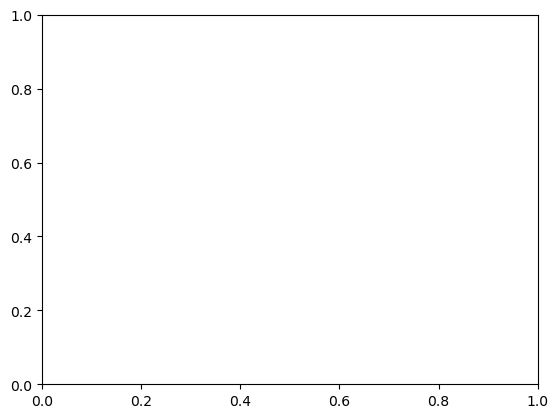

In [32]:
plt.plot(range(epochs), costos_totales)
plt.ylabel('Costos')
plt.xlabel('Generaciones')

In [33]:
#Predecir
predicciones = []

with torch.no_grad():
  for i, data in enumerate(X_test_t):
    y_pred_test = red_pytorch(data)
    predicciones.append(y_pred_test.argmax().item())

predicciones

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [34]:
#Evaluación de testeo
print(confusion_matrix(y_test, predicciones))
print(classification_report(y_test, predicciones))

[[125  25]
 [ 42  39]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       150
           1       0.61      0.48      0.54        81

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.66       231
weighted avg       0.70      0.71      0.70       231



###Crear Modelo con Keras/Tensorflow

In [35]:
#importar modulo

from keras.models import Sequential
from keras.layers import Dense

In [36]:
#Crear el modelo

red_keras = Sequential()
red_keras.add(Dense(8, input_dim = 8, activation= 'relu'))#entrada
red_keras.add(Dense(8, activation= 'relu'))
red_keras.add(Dense(4, activation= 'relu'))
red_keras.add(Dense(1, activation= 'sigmoid'))

red_keras.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
#entrenamiento

historial = red_keras.fit(X_train, y_train, epochs = 2000, batch_size = 10, validation_data = (X_test, y_test))

Epoch 1/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6243 - loss: 4.3688 - val_accuracy: 0.6494 - val_loss: 0.6677
Epoch 2/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.6562 - loss: 0.6643 - val_accuracy: 0.6494 - val_loss: 0.6401
Epoch 3/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.6542 - loss: 0.6535 - val_accuracy: 0.6494 - val_loss: 0.6353
Epoch 4/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.6449 - loss: 0.6534 - val_accuracy: 0.6494 - val_loss: 0.6583
Epoch 5/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.6373 - loss: 0.6599 - val_accuracy: 0.6494 - val_loss: 0.6271
Epoch 6/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.6691 - loss: 0.6398 - val_accuracy: 0.6494 - val_loss: 0.6337
Epoch 7/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.6564 - loss: 0.6406 - val_accuracy: 0.6494 - val_loss: 0.6207
Epoch 8/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.6324 - loss: 0.6545 - va

Epoch 51/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.6288 - loss: 0.6265 - val_accuracy: 0.6494 - val_loss: 0.6474
Epoch 52/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.6369 - loss: 0.6511 - val_accuracy: 0.6494 - val_loss: 0.5945
Epoch 53/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.6612 - loss: 0.6168 - val_accuracy: 0.6494 - val_loss: 0.5942
Epoch 54/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.6542 - loss: 0.6146 - val_accuracy: 0.6494 - val_loss: 0.6065
Epoch 55/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.6448 - loss: 0.6244 - val_accuracy: 0.6494 - val_loss: 0.6083
Epoch 56/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.6386 - loss: 0.6216 - val_accuracy: 0.6494 - val_loss: 0.6076
Epoch 57/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.6122 - loss: 0.6398 - val_accuracy: 0.6494 - val_loss: 0.6092
Epoch 58/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.6700 - loss: 0

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.6194 - loss: 0.6478 - val_accuracy: 0.6494 - val_loss: 0.6101
Epoch 150/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.6738 - loss: 0.5841 - val_accuracy: 0.6494 - val_loss: 0.5953
Epoch 151/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.6674 - loss: 0.5788 - val_accuracy: 0.6494 - val_loss: 0.5979
Epoch 152/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.6872 - loss: 0.5794 - val_accuracy: 0.6494 - val_loss: 0.5994
Epoch 153/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.6663 - loss: 0.5936 - val_accuracy: 0.6494 - val_loss: 0.5977
Epoch 154/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.6470 - loss: 0.6023 - val_accuracy: 0.6494 - val_loss: 0.6170
Epoch 155/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.6531 - loss: 0.5840 - val_accuracy: 0.6494 - val_loss: 0.5875
Epoch 156/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.6122 - loss: 0.6267 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.6498 - loss: 0.6106 - val_accuracy: 0.6494 - val_loss: 0.5865
Epoch 248/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.6715 - loss: 0.5784 - val_accuracy: 0.6494 - val_loss: 0.6105
Epoch 249/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.6264 - loss: 0.5842 - val_accuracy: 0.6494 - val_loss: 0.6048
Epoch 250/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.6625 - loss: 0.5749 - val_accuracy: 0.6494 - val_loss: 0.6179
Epoch 251/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.6311 - loss: 0.5980 - val_accuracy: 0.6494 - val_loss: 0.5945
Epoch 252/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.6541 - loss: 0.5823 - val_accuracy: 0.6494 - val_loss: 0.6014
Epoch 253/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.6405 - loss: 0.5978 - val_accuracy: 0.6494 - val_loss: 0.5985
Epoch 254/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.6299 - loss: 0.6006 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.6555 - loss: 0.5901 - val_accuracy: 0.6494 - val_loss: 0.5828
Epoch 346/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.6621 - loss: 0.5799 - val_accuracy: 0.6494 - val_loss: 0.5787
Epoch 347/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.6538 - loss: 0.5793 - val_accuracy: 0.6494 - val_loss: 0.6075
Epoch 348/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.6531 - loss: 0.5716 - val_accuracy: 0.6494 - val_loss: 0.6022
Epoch 349/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.6587 - loss: 0.5408 - val_accuracy: 0.6494 - val_loss: 0.6280
Epoch 350/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.6610 - loss: 0.5781 - val_accuracy: 0.6494 - val_loss: 0.5840
Epoch 351/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.6605 - loss: 0.6000 - val_accuracy: 0.6494 - val_loss: 0.6300
Epoch 352/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.6762 - loss: 0.5735 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.6919 - loss: 0.5684 - val_accuracy: 0.6883 - val_loss: 0.5892
Epoch 444/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.7388 - loss: 0.5309 - val_accuracy: 0.7186 - val_loss: 0.5706
Epoch 445/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.6882 - loss: 0.5612 - val_accuracy: 0.6623 - val_loss: 0.6011
Epoch 446/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.6885 - loss: 0.5472 - val_accuracy: 0.7143 - val_loss: 0.5656
Epoch 447/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.6958 - loss: 0.5592 - val_accuracy: 0.6970 - val_loss: 0.5902
Epoch 448/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.7184 - loss: 0.5661 - val_accuracy: 0.7056 - val_loss: 0.5817
Epoch 449/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.6749 - loss: 0.5725 - val_accuracy: 0.6926 - val_loss: 0.5878
Epoch 450/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.6982 - loss: 0.5487 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.6769 - loss: 0.5545 - val_accuracy: 0.6277 - val_loss: 0.6102
Epoch 542/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.6984 - loss: 0.5355 - val_accuracy: 0.6537 - val_loss: 0.6119
Epoch 543/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.7222 - loss: 0.5168 - val_accuracy: 0.5411 - val_loss: 0.6474
Epoch 544/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.6909 - loss: 0.5529 - val_accuracy: 0.6407 - val_loss: 0.5987
Epoch 545/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.7226 - loss: 0.5387 - val_accuracy: 0.7186 - val_loss: 0.5981
Epoch 546/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.7040 - loss: 0.5144 - val_accuracy: 0.7186 - val_loss: 0.5647
Epoch 547/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.6757 - loss: 0.5518 - val_accuracy: 0.6970 - val_loss: 0.5727
Epoch 548/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.6972 - loss: 0.5237 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.7328 - loss: 0.5372 - val_accuracy: 0.4286 - val_loss: 0.7331
Epoch 640/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.5684 - loss: 0.6257 - val_accuracy: 0.7446 - val_loss: 0.6163
Epoch 641/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.7233 - loss: 0.5127 - val_accuracy: 0.6234 - val_loss: 0.6123
Epoch 642/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.7239 - loss: 0.5067 - val_accuracy: 0.6883 - val_loss: 0.5750
Epoch 643/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.7004 - loss: 0.5346 - val_accuracy: 0.7446 - val_loss: 0.6123
Epoch 644/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.7211 - loss: 0.5226 - val_accuracy: 0.7229 - val_loss: 0.6335
Epoch 645/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.7440 - loss: 0.5246 - val_accuracy: 0.7532 - val_loss: 0.6261
Epoch 646/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7296 - loss: 0.5455 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7076 - loss: 0.5350 - val_accuracy: 0.7532 - val_loss: 0.6444
Epoch 738/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.7046 - loss: 0.5209 - val_accuracy: 0.7403 - val_loss: 0.5791
Epoch 739/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.7035 - loss: 0.5076 - val_accuracy: 0.7100 - val_loss: 0.5861
Epoch 740/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.6994 - loss: 0.5319 - val_accuracy: 0.7056 - val_loss: 0.5757
Epoch 741/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.7344 - loss: 0.5066 - val_accuracy: 0.7229 - val_loss: 0.5732
Epoch 742/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.7626 - loss: 0.4763 - val_accuracy: 0.6883 - val_loss: 0.5948
Epoch 743/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.7566 - loss: 0.4821 - val_accuracy: 0.7229 - val_loss: 0.5789
Epoch 744/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.7643 - loss: 0.5017 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.7064 - loss: 0.5307 - val_accuracy: 0.7013 - val_loss: 0.5800
Epoch 836/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.7624 - loss: 0.4860 - val_accuracy: 0.6710 - val_loss: 0.5952
Epoch 837/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.7623 - loss: 0.5011 - val_accuracy: 0.7229 - val_loss: 0.6995
Epoch 838/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.6849 - loss: 0.5318 - val_accuracy: 0.7186 - val_loss: 0.6817
Epoch 839/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.6736 - loss: 0.5547 - val_accuracy: 0.6797 - val_loss: 0.5975
Epoch 840/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.6910 - loss: 0.5140 - val_accuracy: 0.6753 - val_loss: 0.6064
Epoch 841/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.7019 - loss: 0.5773 - val_accuracy: 0.7359 - val_loss: 0.5764
Epoch 842/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.7208 - loss: 0.5107 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.7221 - loss: 0.4992 - val_accuracy: 0.7186 - val_loss: 0.5800
Epoch 934/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.7506 - loss: 0.5121 - val_accuracy: 0.6623 - val_loss: 0.6173
Epoch 935/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.6806 - loss: 0.5578 - val_accuracy: 0.7576 - val_loss: 0.5869
Epoch 936/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.7447 - loss: 0.4786 - val_accuracy: 0.7273 - val_loss: 0.6982
Epoch 937/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.7267 - loss: 0.5756 - val_accuracy: 0.6970 - val_loss: 0.6121
Epoch 938/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.7577 - loss: 0.5029 - val_accuracy: 0.6970 - val_loss: 0.6550
Epoch 939/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.7388 - loss: 0.5025 - val_accuracy: 0.7316 - val_loss: 0.6675
Epoch 940/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.7059 - loss: 0.5194 -

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.7522 - loss: 0.5121 - val_accuracy: 0.7532 - val_loss: 0.5935
Epoch 1032/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.7431 - loss: 0.5028 - val_accuracy: 0.7403 - val_loss: 0.6035
Epoch 1033/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.7378 - loss: 0.5270 - val_accuracy: 0.7316 - val_loss: 0.5893
Epoch 1034/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.6912 - loss: 0.5696 - val_accuracy: 0.6753 - val_loss: 0.5997
Epoch 1035/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.7650 - loss: 0.4791 - val_accuracy: 0.7056 - val_loss: 0.5797
Epoch 1036/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.7501 - loss: 0.4813 - val_accuracy: 0.6364 - val_loss: 0.6342
Epoch 1037/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.6743 - loss: 0.5694 - val_accuracy: 0.7359 - val_loss: 0.6282
Epoch 1038/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.7706 - loss: 0

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.7506 - loss: 0.4828 - val_accuracy: 0.6883 - val_loss: 0.6070
Epoch 1130/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.7729 - loss: 0.4708 - val_accuracy: 0.7273 - val_loss: 0.6509
Epoch 1131/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.7452 - loss: 0.4629 - val_accuracy: 0.7489 - val_loss: 0.6403
Epoch 1132/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.7205 - loss: 0.5364 - val_accuracy: 0.7229 - val_loss: 0.6670
Epoch 1133/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.7165 - loss: 0.5448 - val_accuracy: 0.7143 - val_loss: 0.5943
Epoch 1134/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7058 - loss: 0.5060 - val_accuracy: 0.6537 - val_loss: 0.6988
Epoch 1135/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.7407 - loss: 0.5165 - val_accuracy: 0.7229 - val_loss: 0.6048
Epoch 1136/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.7235 - loss: 0

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.7411 - loss: 0.4781 - val_accuracy: 0.7446 - val_loss: 0.6363
Epoch 1228/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.7676 - loss: 0.4606 - val_accuracy: 0.6234 - val_loss: 0.6957
Epoch 1229/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.7764 - loss: 0.4835 - val_accuracy: 0.6797 - val_loss: 0.6519
Epoch 1230/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.7739 - loss: 0.4718 - val_accuracy: 0.6320 - val_loss: 0.6690
Epoch 1231/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.7555 - loss: 0.5139 - val_accuracy: 0.6450 - val_loss: 0.6180
Epoch 1232/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.7407 - loss: 0.4787 - val_accuracy: 0.6407 - val_loss: 0.6384
Epoch 1233/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.7556 - loss: 0.4792 - val_accuracy: 0.6623 - val_loss: 0.6387
Epoch 1234/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.6898 - loss: 0

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.7187 - loss: 0.5120 - val_accuracy: 0.6190 - val_loss: 0.6805
Epoch 1326/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.7252 - loss: 0.5141 - val_accuracy: 0.5931 - val_loss: 0.6722
Epoch 1327/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.7051 - loss: 0.5062 - val_accuracy: 0.7273 - val_loss: 0.6829
Epoch 1328/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.7565 - loss: 0.5077 - val_accuracy: 0.7403 - val_loss: 0.6378
Epoch 1329/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.7571 - loss: 0.4820 - val_accuracy: 0.7056 - val_loss: 0.6006
Epoch 1330/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.7559 - loss: 0.4948 - val_accuracy: 0.7273 - val_loss: 0.6656
Epoch 1331/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.7549 - loss: 0.4902 - val_accuracy: 0.7056 - val_loss: 0.7181
Epoch 1332/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.7416 - loss: 0

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.7475 - loss: 0.5492 - val_accuracy: 0.6753 - val_loss: 0.6251
Epoch 1424/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.7178 - loss: 0.5198 - val_accuracy: 0.7403 - val_loss: 0.6320
Epoch 1425/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.7098 - loss: 0.5155 - val_accuracy: 0.7186 - val_loss: 0.5964
Epoch 1426/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.7477 - loss: 0.4813 - val_accuracy: 0.6970 - val_loss: 0.6208
Epoch 1427/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.7387 - loss: 0.4893 - val_accuracy: 0.7100 - val_loss: 0.5999
Epoch 1428/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.7378 - loss: 0.4773 - val_accuracy: 0.6710 - val_loss: 0.5927
Epoch 1429/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.7706 - loss: 0.4657 - val_accuracy: 0.7100 - val_loss: 0.6341
Epoch 1430/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.7434 - loss: 0

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.7565 - loss: 0.4877 - val_accuracy: 0.7576 - val_loss: 0.5749
Epoch 1522/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.7471 - loss: 0.5006 - val_accuracy: 0.7532 - val_loss: 0.6162
Epoch 1523/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.7468 - loss: 0.4710 - val_accuracy: 0.7359 - val_loss: 0.6881
Epoch 1524/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.7775 - loss: 0.4721 - val_accuracy: 0.7316 - val_loss: 0.6633
Epoch 1525/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.7388 - loss: 0.4812 - val_accuracy: 0.6190 - val_loss: 0.6434
Epoch 1526/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.7418 - loss: 0.4958 - val_accuracy: 0.6883 - val_loss: 0.5925
Epoch 1527/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.7577 - loss: 0.4713 - val_accuracy: 0.7532 - val_loss: 0.6336
Epoch 1528/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.7574 - loss: 0

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.7324 - loss: 0.4841 - val_accuracy: 0.7056 - val_loss: 0.6209
Epoch 1620/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.7528 - loss: 0.4578 - val_accuracy: 0.6797 - val_loss: 0.5947
Epoch 1621/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.7685 - loss: 0.4531 - val_accuracy: 0.6623 - val_loss: 0.6103
Epoch 1622/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.7697 - loss: 0.4525 - val_accuracy: 0.7403 - val_loss: 0.6682
Epoch 1623/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.7279 - loss: 0.5255 - val_accuracy: 0.7056 - val_loss: 0.5967
Epoch 1624/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.7316 - loss: 0.5131 - val_accuracy: 0.6667 - val_loss: 0.6042
Epoch 1625/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.7299 - loss: 0.5184 - val_accuracy: 0.6537 - val_loss: 0.6371
Epoch 1626/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.7611 - loss: 0

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.7372 - loss: 0.4692 - val_accuracy: 0.7359 - val_loss: 0.7609
Epoch 1718/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.7693 - loss: 0.4886 - val_accuracy: 0.6883 - val_loss: 0.6573
Epoch 1719/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.7765 - loss: 0.4518 - val_accuracy: 0.6623 - val_loss: 0.6720
Epoch 1720/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.7405 - loss: 0.5013 - val_accuracy: 0.6970 - val_loss: 0.6575
Epoch 1721/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.7998 - loss: 0.4391 - val_accuracy: 0.7143 - val_loss: 0.6561
Epoch 1722/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.7350 - loss: 0.4872 - val_accuracy: 0.6623 - val_loss: 0.7251
Epoch 1723/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.7518 - loss: 0.5251 - val_accuracy: 0.7403 - val_loss: 0.6416
Epoch 1724/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.7776 - loss: 0

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.7705 - loss: 0.4710 - val_accuracy: 0.6970 - val_loss: 0.8009
Epoch 1816/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7523 - loss: 0.4794 - val_accuracy: 0.7229 - val_loss: 0.7141
Epoch 1817/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.7493 - loss: 0.4812 - val_accuracy: 0.7143 - val_loss: 0.7860
Epoch 1818/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.7331 - loss: 0.4935 - val_accuracy: 0.7229 - val_loss: 0.6992
Epoch 1819/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.7539 - loss: 0.4676 - val_accuracy: 0.7446 - val_loss: 0.7579
Epoch 1820/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.7148 - loss: 0.5120 - val_accuracy: 0.7229 - val_loss: 0.7606
Epoch 1821/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.7525 - loss: 0.4748 - val_accuracy: 0.6970 - val_loss: 0.7541
Epoch 1822/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.7520 - loss: 0

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.7312 - loss: 0.4848 - val_accuracy: 0.6623 - val_loss: 0.7633
Epoch 1914/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.7625 - loss: 0.4602 - val_accuracy: 0.7489 - val_loss: 0.7349
Epoch 1915/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.7516 - loss: 0.4909 - val_accuracy: 0.6970 - val_loss: 0.6735
Epoch 1916/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.7351 - loss: 0.4773 - val_accuracy: 0.6970 - val_loss: 0.6778
Epoch 1917/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.7724 - loss: 0.4630 - val_accuracy: 0.7359 - val_loss: 0.6626
Epoch 1918/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.7537 - loss: 0.4904 - val_accuracy: 0.7489 - val_loss: 0.7143
Epoch 1919/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.7808 - loss: 0.4449 - val_accuracy: 0.6450 - val_loss: 0.7059
Epoch 1920/2000
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.7415 - loss: 0

In [38]:
#Evaluación
evaluacion = red_keras.evaluate(X_test,y_test)
print("%s: %.2f%%" % (red_keras.metrics_names[1], evaluacion[1]*100))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.7109 - loss: 0.8225
compile_metrics: 73.59%


In [40]:
predicciones = red_keras.predict(X_test)
predicciones = np.argmax(predicciones, axis=1)

print(confusion_matrix(y_test, predicciones))
print(classification_report(y_test, predicciones))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
[[150   0]
 [ 81   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       150
           1       0.00      0.00      0.00        81

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231



/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

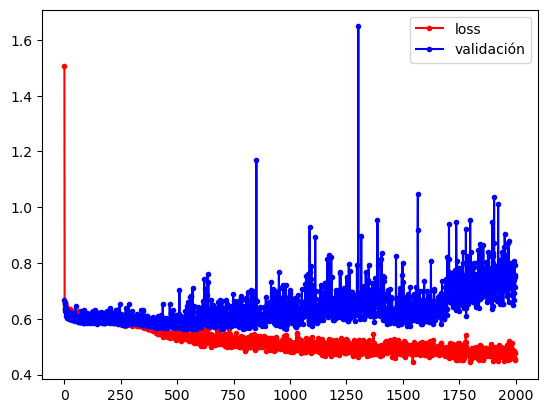

In [41]:
fig, ax = plt.subplots()
ax.plot(historial.history["loss"], 'r', marker='.', label = 'loss')
ax.plot(historial.history["val_loss"], 'b', marker='.', label = 'validación')
ax.legend();

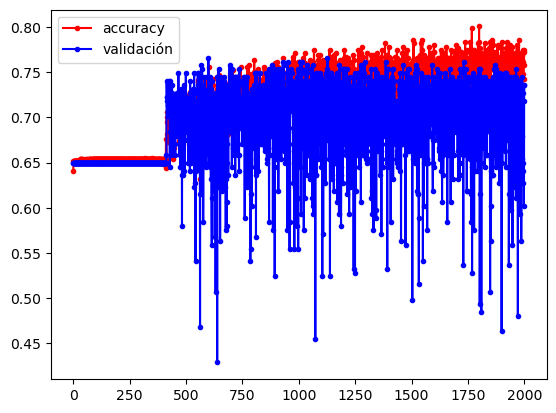

In [42]:
fig, ax = plt.subplots()
ax.plot(historial.history["accuracy"], 'r', marker='.', label = 'accuracy')
ax.plot(historial.history["val_accuracy"], 'b', marker='.', label = 'validación')
ax.legend();